# 🌐 #30DayMapChallenge - Day 24: Only Circular Shapes

**Map for day 24 of the [#30DayMapChallenge](https://30daymapchallenge.com/) 2024, created by Náttúrufræðistofnun.**

---

### Overview
This project focuses on **circular shapes** by extracting **roundabouts** in Iceland from **OpenStreetMap** using the `osmnx` Python package and `samgeo`.

The workflow involves:
- Extracting roundabouts and converting them to **polygon geometries**.
- Cropping each roundabout from **Google Satellite imagery**.
- Exporting roundabouts as single images or backgrounds for visualization.
- Creating a **pie chart** to show the distribution of roundabouts across municipalities.
- Designing a **special legend** with circular points for the map.

This notebook demonstrates how to blend spatial analysis, satellite imagery, and creative design to highlight Iceland's roundabouts in an engaging way.

---

### How to Use
Try the notebook to explore Icelandic roundabouts or customize it for your own region!

| Run the code via free cloud platforms: | [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/lmi/30DayMapChallenge/master?filepath=/Day-24/Day24-CircularShapes.ipynb) | [![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/lmi/30DayMapChallenge/blob/master/Day-24/Day24-CircularShapes.ipynb) | [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lmi/30DayMapChallenge/blob/master/Day-24/Day24-CircularShapes.ipynb) |
|---|---|---|---|

---

### Highlights from the Map
- **Reykjavíkurborg** has the most roundabouts (73), followed by **Hafnarfjarðarkaupstaður** (43) and **Kópavogsbær** (41).
- **Sveitarfélagið Vogar** has the highest roundabouts per capita, with 8 roundabouts serving just 1,500 residents (0.53%).

---

### Attribution
- **License**: This notebook is published under **CC BY 4.0**.
- **Author**: Marco Pizzolato
- **Tools Used**: Python, `osmnx`, `samgeo` and satellite imagery from Google
- **Data Sources**: [OpenStreetMap](https://www.openstreetmap.org/), Map data ©2024 Google
- **Created in**: Python with `matplotlib`, `osmnx`, `samgeo` and other libraries

---

**Explore Icelandic roundabouts with a unique perspective—data-driven and visually compelling!**

![Day 24 - Only Circular Shapes](https://drive.google.com/uc?id=1KapI2i6QBrvAllHCXgdIpIWf4ajs9idr)


# Import

In [1]:
# Install
%pip install segment-geospatial leafmap localtileserver rasterio osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.7/502.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 70.6 MB/s

In [1]:
# Import
import os
import leafmap
from samgeo.hq_sam import (
    SamGeo,
    show_image,
    download_file,
    overlay_images,
    tms_to_geotiff,
)
import geopandas as gpd
from shapely.geometry import box
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt
import os
import osmnx as ox

## Interactive map to see how roundabout look like

In [2]:
# Prepare map (Leafmap in this case)
m = leafmap.Map(center=[64.1672, -21.6854], zoom=13, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[64.1672, -21.6854], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

# Shapes

In [3]:
# Define the location for Iceland
place_name = "Iceland"

# Define custom filters to extract roundabouts
# 'junction=roundabout' is the key for roundabouts in OSM data
custom_filter = '["junction"="roundabout"]'

# Get roundabouts in Iceland
roundabouts_gdf = ox.geometries_from_place(place_name, tags={"junction": "roundabout"})

# Display the GeoDataFrame
roundabouts_gdf


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

admin_ref  \
element_type osmid                            
way          321432457            1-c3/1-c4   
             951272302                  NaN   
             192639873   37-01/37-02;365-01   
             208922205                  NaN   
             211925849                  NaN   
...                                     ...   
             1258829883                 NaN   
             1259037854                 NaN   
             1286058225                 NaN   
             178716618            1-g7/1-g8   
             154565342                  NaN   

                                                                    source  \
element_type osmid                                                           
way          321432457   http://www.vegagerdin.is/vefur2.nsf/Files/Vega...   
             951272302                                                 NaN   
             192639873   http://www.vegagerdin.is/vefur2.nsf/Files/Vega...   
             208922205                                                 NaN   
             211925849                                                 NaN   
...                                                                    ...   
             1258829883                                                NaN   
             1259037854                                                NaN   
             1286058225                                                NaN   
             178716618   http://www.vegagerdin.is/vefur2.nsf/Files/Vega...   
             154565342                                                 NaN   

                                                                  geometry  \
element_type osmid                                                           
way          321432457   LINESTRING (-20.40220 63.83457, -20.40230 63.8...   
             951272302   LINESTRING (-20.50184 63.87903, -20.50179 63.8...   
             192639873   LINESTRING (-20.74301 64.21199, -20.74307 64.2...   
             208922205   LINESTRING (-20.33444 64.14260, -20.33437 64.1...   
             211925849   LINESTRING (-20.45292 64.17787, -20.45293 64.1...   
...                                                                    ...   
             1258829883  LINESTRING (-22.69978 64.03895, -22.69978 64.0...   
             1259037854  LINESTRING (-22.55547 63.99755, -22.55547 63.9...   
             1286058225  LINESTRING (-21.85888 64.15302, -21.85891 64.1...   
             178716618   LINESTRING (-21.89765 64.56033, -21.89776 64.5...   
             154565342   LINESTRING (-23.12474 66.07499, -23.12484 66.0...   

                                                                     nodes  \
element_type osmid                                                           
way          321432457   [276552674, 1777272680, 276552677, 1777272679,...   
             951272302   [8805143134, 8864271153, 8805143127, 880514312...   
             192639873   [2031855663, 2031855659, 2031855649, 203185564...   
             208922205   [2956668894, 2956668895, 6335991187, 295666889...   
             211925849   [6932427518, 6932427541, 2218536761, 238900969...   
...                                                                    ...   
             1258829883  [11702070785, 11702070786, 206196111, 11702070...   
             1259037854  [11704077172, 11704077173, 11704077177, 117040...   
             1286058225  [11929133098, 11929133099, 11929133100, 119291...   
             178716618   [10304496711, 5029433510, 2267582875, 50294335...   
             154565342   [304000928, 1579390244, 304000930, 1579390252,...   

                        bicycle cycleway:both designation    highway  \
element_type osmid                                                     
way          321432457      yes            no           S      trunk   
             951272302      yes            no           S      trunk   
             192639873      NaN           NaN           S    primary   
             2089

In [4]:
# Export the initial dataset
roundabouts_gdf.shape
roundabouts_gdf.to_file('roundabouts.gpkg', layer='roundabouts', driver="GPKG")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

In [5]:
# Remove nodes and keep the lines that make a roundabout road
line_features_gdf = roundabouts_gdf[roundabouts_gdf.geometry.type.isin(["LineString", "MultiLineString"])]
line_features_gdf.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(329, 46)

In [6]:
from shapely.geometry import Polygon

# Filter closed LineStrings
closed_lines_gdf = line_features_gdf[line_features_gdf.geometry.apply(lambda geom: geom.is_closed if geom else False)].copy()

# Convert closed LineStrings to Polygons
closed_lines_gdf['geometry'] = closed_lines_gdf.geometry.apply(lambda geom: Polygon(geom))

# Resulting GeoDataFrame with polygons
polygons_gdf = closed_lines_gdf

# Show info
polygons_gdf.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(289, 46)

In [7]:
# Create a new GeoDataFrame for points using the centroids of polygons
point_gdf = gpd.GeoDataFrame(polygons_gdf.drop(columns='geometry'), geometry=polygons_gdf.geometry.centroid, crs=polygons_gdf.crs)

# Show info
point_gdf.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-36ef8ea11270>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point_gdf = gpd.GeoDataFrame(polygons_gdf.drop(columns='geometry'), geometry=polygons_gdf.geometry.centroid, crs=polygons_gdf.crs)


(289, 46)

## Add the municipality boundary

In [8]:
import requests
import geopandas as gpd

# Download the municipalities GeoPackage
url_mork = "https://gis.natt.is/geoserver/IS_50V/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=IS_50V%3Amork_sveitarf_flakar&maxFeatures=100000&outputFormat=application%2Fjson"
response = requests.get(url_mork)
with open("mork.geojson", "wb") as f:
    f.write(response.content)

# Load the municipalities GeoDataFrame and reproject to EPSG:3857
mork_gdf = gpd.read_file("mork.geojson").to_crs(3857)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Reproject point_gdf to EPSG:3857
point_gdf = point_gdf.to_crs(3857)

# Perform a spatial join to find the municipality for each point
point_with_mork = gpd.sjoin(
    point_gdf, mork_gdf[['geometry', 'nrsveitarfelags','sveitarfelag']],
    how='left',
    op='within')

point_gdf = point_with_mork

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [10]:
point_gdf.to_file('points_municipality.gpkg', layer='roundabouts', driver="GPKG")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
municipality_counts = point_gdf['sveitarfelag'].value_counts()
municipality_counts

sveitarfelag
Reykjavíkurborg                  73
Hafnarfjarðarkaupstaður          43
Kópavogsbær                      41
Garðabær                         29
Reykjanesbær                     22
Mosfellsbær                      16
Akureyrarbær                     13
Sveitarfélagið Árborg            10
Sveitarfélagið Vogar              8
Akraneskaupstaður                 5
Bláskógabyggð                     3
Grindavíkurbær                    3
Suðurnesjabær                     2
Borgarbyggð                       2
Rangárþing ytra                   2
Grímsnes- og Grafningshreppur     2
Hrunamannahreppur                 2
Flóahreppur                       1
Sveitarfélagið Ölfus              1
Fjarðabyggð                       1
Skaftárhreppur                    1
Hveragerðisbær                    1
Hörgársveit                       1
Svalbarðsstrandarhreppur          1
Mýrdalshreppur                    1
Skagafjörður                      1
Húnabyggð                         1
Hvalfjarðarsveit                  1
Seltjarnarnesbær                  1
Ísafjarðarbær                     1
Name: count, dtype: int64

## Get font

In [15]:
# URL of the TTF font
font_url = 'https://fonts.gstatic.com/s/supermercadoone/v27/OpNXnpQWg8jc_xps_Gi14kVVEXOn60b3MClBRTs.ttf'

# Download the font
font_path = "font.ttf"
response = requests.get(font_url)
with open(font_path, "wb") as f:
    f.write(response.content)

print(f"Font downloaded and saved to {font_path}")

Font downloaded and saved to font.ttf


## Make statistics

/usr/lib/python3.10/tokenize.py:527: ResourceWarning: unclosed <ssl.SSLSocket fd=95, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33246), raddr=('172.217.204.100', 443)>
  pseudomatch = _compile(PseudoToken).match(line, pos)
/usr/lib/python3.10/tokenize.py:527: ResourceWarning: unclosed <ssl.SSLSocket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33250), raddr=('172.217.204.100', 443)>
  pseudomatch = _compile(PseudoToken).match(line, pos)
/usr/lib/python3.10/tokenize.py:527: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33236), raddr=('172.217.204.100', 443)>
  pseudomatch = _compile(PseudoToken).match(line, pos)
/usr/lib/python3.10/tokenize.py:527: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33222), raddr=

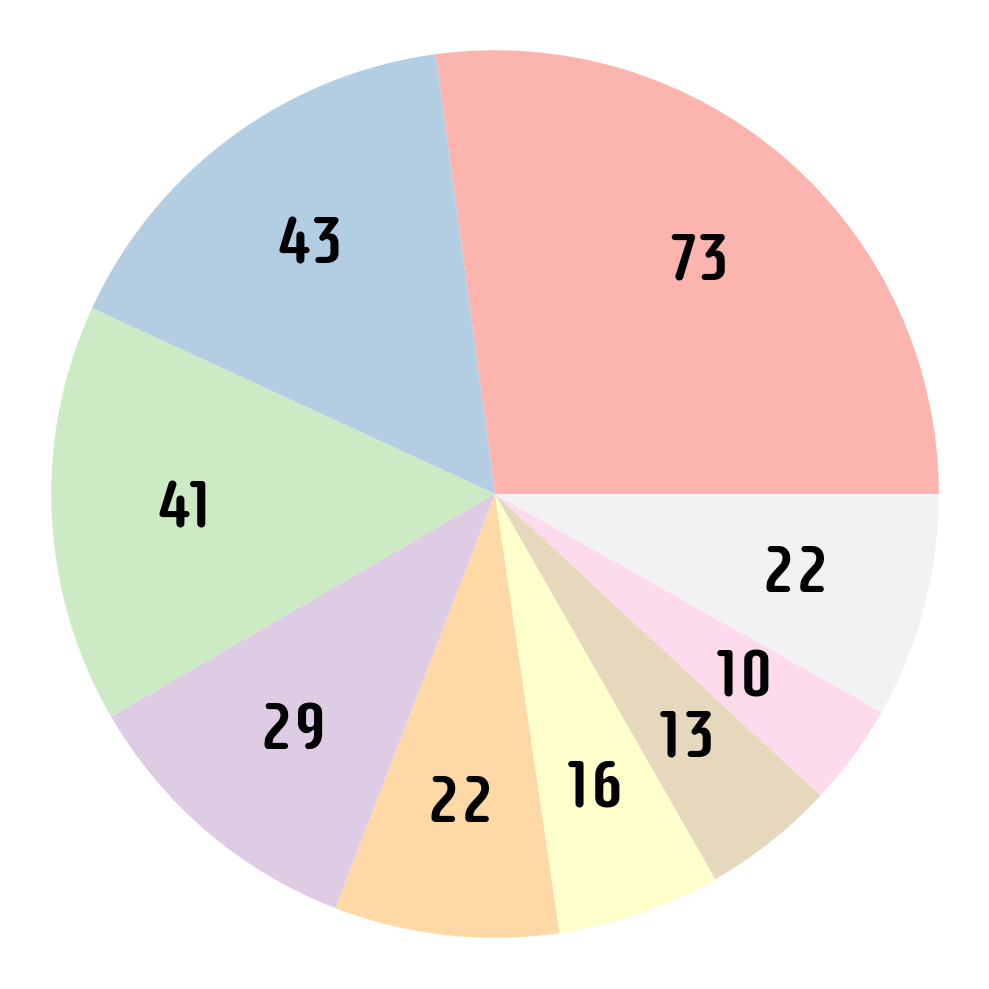

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Count the number of roundabouts per municipality
municipality_counts = point_gdf['sveitarfelag'].value_counts()

# Group municipalities with fewer than 10 roundabouts into "Other"
municipality_counts_grouped = municipality_counts.copy()
municipality_counts_grouped.loc[municipality_counts_grouped < 10] = np.nan  # Mark smaller categories as NaN
other_count = municipality_counts_grouped.isna().sum()  # Sum the counts for the "Other" category
municipality_counts_grouped = municipality_counts_grouped.dropna()  # Keep only the larger categories
municipality_counts_grouped["Other"] = other_count  # Add "Other" to the grouped data

# Extract data for the pie chart
municipalities = municipality_counts_grouped.index.tolist()
counts = municipality_counts_grouped.values

# Load a custom font (replace 'path_to_your_font.ttf' with the actual path to your .ttf file)
custom_font_path = "font.ttf"  # Provide the actual path
custom_font = fm.FontProperties(fname=custom_font_path)

# Use a specific color palette
color_palette = plt.colormaps['Pastel1']  # Replace with 'Paired' or another palette as needed
colors = color_palette(np.linspace(0, 1, len(counts)))

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(
    counts,
    labels=None,  # No labels on the pie chart
    startangle=0,
    colors=colors,  # Apply color palette
    wedgeprops=dict(edgecolor='none')  # Remove black outlines
)

# Add only the count as text on the wedges
for wedge, count in zip(wedges, counts):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.7 * np.cos(np.deg2rad(angle))  # Adjust text distance from center
    y = 0.7 * np.sin(np.deg2rad(angle))
    ax.text(
        x, y, f"{int(count)}",  # Display only the count
        ha='center', va='center',
        fontsize=50, color='Black', fontproperties=custom_font
    )

# Ensure the pie chart is circular
ax.axis('equal')

# Display the pie chart
plt.tight_layout()
plt.show()


In [22]:
# Save the figure as a high-quality image
fig.savefig("figure.png", dpi=300, bbox_inches='tight', format='png')

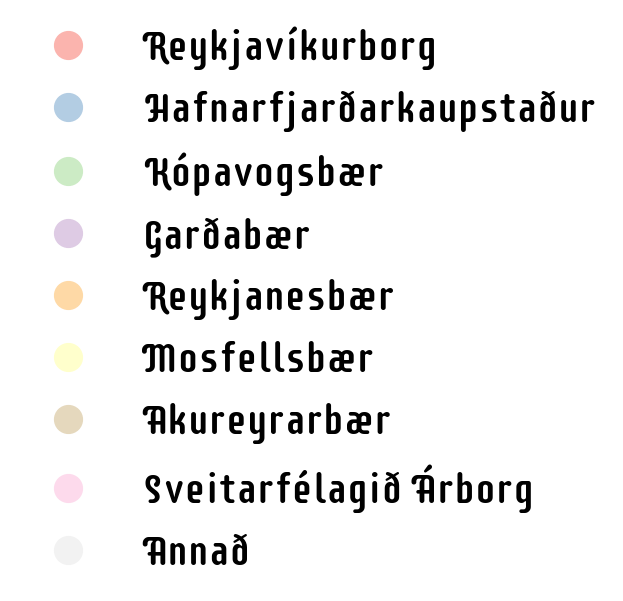

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.font_manager as fm

# Count the number of roundabouts per municipality
municipality_counts = point_gdf['sveitarfelag'].value_counts()

# Group municipalities with fewer than 10 roundabouts into "Other"
municipality_counts_grouped = municipality_counts.copy()
municipality_counts_grouped.loc[municipality_counts_grouped < 10] = np.nan  # Mark smaller categories as NaN
other_count = municipality_counts_grouped.isna().sum()  # Sum the counts for the "Other" category
municipality_counts_grouped = municipality_counts_grouped.dropna()  # Keep only the larger categories
municipality_counts_grouped["Annað"] = other_count  # Add "Other" to the grouped data

# Extract municipalities and colors
municipalities = municipality_counts_grouped.index.tolist()
counts = municipality_counts_grouped.values

# Load a custom font (replace with your font path)
custom_font_path = "font.ttf"  # Provide the actual path
custom_font = fm.FontProperties(fname=custom_font_path, size=30)  # Set font size to 30

# Use a specific color palette
color_palette = plt.colormaps['Pastel1']  # Replace with 'Paired' or another palette as needed
colors = color_palette(np.linspace(0, 1, len(counts)))

# Create a blank figure for the legend
fig, ax = plt.subplots(figsize=(4, len(municipalities) / 2))  # Adjust height dynamically

# Create legend handles with colored circles
handles = [
    mlines.Line2D([0], [0], color=color, marker='o', markersize=20, linestyle='None')  # Circle size adjusted with `markersize`
    for color in colors
]

# Add the legend
ax.legend(
    handles, municipalities,
    title="",
    loc="center",
    bbox_to_anchor=(0.5, 0.5),  # Center the legend in the figure
    frameon=False,  # Transparent legend background
    prop=custom_font  # Apply custom font
)

# Remove the axes for a clean look
ax.axis('off')

# Show only the legend
plt.tight_layout()
plt.show()


In [19]:
# Save the figure as a high-quality image
fig.savefig("legend.png", dpi=300, bbox_inches='tight', format='png')


## Remove some OSMIDs if needed

In [ ]:
# List of osmids to remove
osmids_to_remove = [
    1292607127, 1316158016, 48547452, 963653602,
    1149463735, 128943330, 178716621, 1153513662,
    1153513663, 1153513665]

# Filter by the level of the MultiIndex containing osmids
point_gdf = point_gdf[~point_gdf.index.get_level_values('osmid').isin(osmids_to_remove)]

# Inspect the updated GeoDataFrame
point_gdf.head(1)

admin_ref  \
element_type osmid                  
way          321432457  1-c3/1-c4   

                                                                   source  \
element_type osmid                                                          
way          321432457  http://www.vegagerdin.is/vefur2.nsf/Files/Vega...   

                                                                    nodes  \
element_type osmid                                                          
way          321432457  [276552674, 1777272680, 276552677, 1777272679,...   

                       bicycle cycleway:both designation highway    junction  \
element_type osmid                                                             
way          321432457     yes            no           S   trunk  roundabout   

                       lanes maxspeed  ... cycleway:left cycleway:left:lane  \
element_type osmid                     ...                                    
way          321432457     1       50  ...           NaN                NaN   

                       cycleway:left:oneway oneway:bicycle sidewalk:both note  \
element_type osmid                                                              
way          321432457                  NaN            NaN           NaN  NaN   

                                                geometry index_right  \
element_type osmid                                                     
way          321432457  POINT (-2271179.134 9307844.580)          67   

                       nrsveitarfelags     sveitarfelag  
element_type osmid                                       
way          321432457            8614  Rangárþing ytra  

[1 rows x 49 columns]

# Download

In [20]:
# Create an output directory for the roundabout images
output_dir = "img"
os.makedirs(output_dir, exist_ok=True)

# Loop through each roundabout polygon
for idx, row in polygons_gdf.iterrows():
    fid = str(idx[1])  # Unique identifier for each roundabout polygon
    geometry = row['geometry']  # The geometry of the roundabout polygon

    # Get the bounding box for the polygon in [minx, miny, maxx, maxy] format
    minx, miny, maxx, maxy = geometry.bounds
    bbox = [minx, miny, maxx, maxy]

    # Define the output path
    output_path = os.path.join(output_dir, f"roundabout_{fid}.tif")

    # Download and save the satellite image for this roundabout
    tms_to_geotiff(output=output_path, bbox=bbox, zoom=17, source="Satellite", overwrite=True)
    print(f"Saved: {output_path}")

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_321432457.tif
Saved: img/roundabout_321432457.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_951272302.tif
Saved: img/roundabout_951272302.tif


<ipython-input-20-f3d59b9cac05>:18: ResourceWarning: unclosed <ssl.SSLSocket fd=55, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60078), raddr=('172.217.204.139', 443)>
  tms_to_geotiff(output=output_path, bbox=bbox, zoom=17, source="Satellite", overwrite=True)


Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_192639873.tif
Saved: img/roundabout_192639873.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_208922205.tif
Saved: img/roundabout_208922205.tif


/usr/lib/python3.10/threading.py:242: ResourceWarning: unclosed <ssl.SSLSocket fd=55, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60086), raddr=('172.217.204.139', 443)>
  self.release = lock.release
/usr/lib/python3.10/threading.py:242: ResourceWarning: unclosed <ssl.SSLSocket fd=56, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60094), raddr=('172.217.204.139', 443)>
  self.release = lock.release
/usr/lib/python3.10/threading.py:242: ResourceWarning: unclosed <ssl.SSLSocket fd=57, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60098), raddr=('172.217.204.139', 443)>
  self.release = lock.release


Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_211925849.tif
Saved: img/roundabout_211925849.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_211925850.tif
Saved: img/roundabout_211925850.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_321743685.tif
Saved: img/roundabout_321743685.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1011673082.tif
Saved: img/roundabout_1011673082.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=56, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60120), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=57, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60136), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60148), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60160), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_960069562.tif
Saved: img/roundabout_960069562.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_791585337.tif
Saved: img/roundabout_791585337.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_978494200.tif
Saved: img/roundabout_978494200.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_161795645.tif
Saved: img/roundabout_161795645.tif


/usr/lib/python3.10/threading.py:932: ResourceWarning: unclosed <ssl.SSLSocket fd=56, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60184), raddr=('172.217.204.139', 443)>
  with _active_limbo_lock:
/usr/lib/python3.10/threading.py:932: ResourceWarning: unclosed <ssl.SSLSocket fd=57, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60186), raddr=('172.217.204.139', 443)>
  with _active_limbo_lock:
/usr/lib/python3.10/threading.py:932: ResourceWarning: unclosed <ssl.SSLSocket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60200), raddr=('172.217.204.139', 443)>
  with _active_limbo_lock:
/usr/lib/python3.10/threading.py:932: ResourceWarning: unclosed <ssl.SSLSocket fd=58, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60212), raddr=('172.217.204.139', 443)>
  with _active_limbo_lock:
/usr/lib/python3.10/threadin

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_161796416.tif
Saved: img/roundabout_161796416.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_163986737.tif
Saved: img/roundabout_163986737.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_163989728.tif
Saved: img/roundabout_163989728.tif


/usr/local/lib/python3.10/dist-packages/h11/_util.py:87: ResourceWarning: unclosed <ssl.SSLSocket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55006), raddr=('172.217.204.139', 443)>
  match = regex.fullmatch(data)
/usr/local/lib/python3.10/dist-packages/h11/_util.py:87: ResourceWarning: unclosed <ssl.SSLSocket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55016), raddr=('172.217.204.139', 443)>
  match = regex.fullmatch(data)
/usr/local/lib/python3.10/dist-packages/h11/_util.py:87: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55022), raddr=('172.217.204.139', 443)>
  match = regex.fullmatch(data)
/usr/local/lib/python3.10/dist-packages/h11/_util.py:87: ResourceWarning: unclosed <ssl.SSLSocket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 6026

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_178716609.tif
Saved: img/roundabout_178716609.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_412455340.tif
Saved: img/roundabout_412455340.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_412535043.tif
Saved: img/roundabout_412535043.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=57, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55054), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=58, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55064), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55070), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55078), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_512658923.tif
Saved: img/roundabout_512658923.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_512949566.tif
Saved: img/roundabout_512949566.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_512949569.tif
Saved: img/roundabout_512949569.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_518354103.tif
Saved: img/roundabout_518354103.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_552547802.tif
Saved: img/roundabout_552547802.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1017485021.tif
Saved: img/roundabout_1017485021.tif


/usr/local/lib/python3.10/dist-packages/httpx/_models.py:884: ResourceWarning: unclosed <ssl.SSLSocket fd=58, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55094), raddr=('172.217.204.139', 443)>
  with request_context(request=self._request):
/usr/local/lib/python3.10/dist-packages/httpx/_models.py:884: ResourceWarning: unclosed <ssl.SSLSocket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55098), raddr=('172.217.204.139', 443)>
  with request_context(request=self._request):
/usr/local/lib/python3.10/dist-packages/httpx/_models.py:884: ResourceWarning: unclosed <ssl.SSLSocket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55102), raddr=('172.217.204.139', 443)>
  with request_context(request=self._request):
/usr/local/lib/python3.10/dist-packages/httpx/_models.py:884: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET,

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1149755535.tif
Saved: img/roundabout_1149755535.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1292607129.tif
Saved: img/roundabout_1292607129.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_288855156.tif
Saved: img/roundabout_288855156.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_39688532.tif
Saved: img/roundabout_39688532.tif
Downloaded image 1/2


/usr/lib/python3.10/concurrent/futures/_base.py:332: ResourceWarning: unclosed <ssl.SSLSocket fd=58, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55134), raddr=('172.217.204.139', 443)>
  self._condition = threading.Condition()
/usr/lib/python3.10/concurrent/futures/_base.py:332: ResourceWarning: unclosed <ssl.SSLSocket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55144), raddr=('172.217.204.139', 443)>
  self._condition = threading.Condition()
/usr/lib/python3.10/concurrent/futures/_base.py:332: ResourceWarning: unclosed <ssl.SSLSocket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55154), raddr=('172.217.204.139', 443)>
  self._condition = threading.Condition()
/usr/lib/python3.10/concurrent/futures/_base.py:332: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.

Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150212898.tif
Saved: img/roundabout_150212898.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_184787729.tif
Saved: img/roundabout_184787729.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_184958323.tif
Saved: img/roundabout_184958323.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_184958328.tif
Saved: img/roundabout_184958328.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_511768307.tif
Saved: img/roundabout_511768307.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_844529037.tif
Saved: img/roundabout_844529037.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 60172), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55090), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55084), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=67, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55124), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_971640043.tif
Saved: img/roundabout_971640043.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_974398669.tif
Saved: img/roundabout_974398669.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...


/usr/lib/python3.10/threading.py:991: ResourceWarning: unclosed <ssl.SSLSocket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55300), raddr=('172.217.204.139', 443)>
  self._tstate_lock = _set_sentinel()
/usr/lib/python3.10/threading.py:991: ResourceWarning: unclosed <ssl.SSLSocket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55290), raddr=('172.217.204.139', 443)>
  self._tstate_lock = _set_sentinel()
/usr/lib/python3.10/threading.py:991: ResourceWarning: unclosed <ssl.SSLSocket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55302), raddr=('172.217.204.139', 443)>
  self._tstate_lock = _set_sentinel()
/usr/lib/python3.10/threading.py:991: ResourceWarning: unclosed <ssl.SSLSocket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55310), raddr=('172.217.204.139', 443)>
  self._tstate_lock = 

Image saved to img/roundabout_1106885720.tif
Saved: img/roundabout_1106885720.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1316158016.tif
Saved: img/roundabout_1316158016.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_5153683.tif
Saved: img/roundabout_5153683.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_5153735.tif
Saved: img/roundabout_5153735.tif


/usr/local/lib/python3.10/dist-packages/h11/_headers.py:118: ResourceWarning: unclosed <ssl.SSLSocket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55358), raddr=('172.217.204.139', 443)>
  _, name, value = self._full_items[idx]
/usr/local/lib/python3.10/dist-packages/h11/_headers.py:118: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55364), raddr=('172.217.204.139', 443)>
  _, name, value = self._full_items[idx]
/usr/local/lib/python3.10/dist-packages/h11/_headers.py:118: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55374), raddr=('172.217.204.139', 443)>
  _, name, value = self._full_items[idx]
/usr/local/lib/python3.10/dist-packages/h11/_headers.py:118: ResourceWarning: unclosed <ssl.SSLSocket fd=70, family=AddressFamily.AF_INET, type=SocketKind.SOCK_

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_5153737.tif
Saved: img/roundabout_5153737.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_7762727.tif
Saved: img/roundabout_7762727.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_8875941.tif
Saved: img/roundabout_8875941.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_10311485.tif
Saved: img/roundabout_10311485.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55432), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55442), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55444), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55450), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_23582376.tif
Saved: img/roundabout_23582376.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_26923372.tif
Saved: img/roundabout_26923372.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_26923466.tif
Saved: img/roundabout_26923466.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_27080505.tif
Saved: img/roundabout_27080505.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_27080528.tif
Saved: img/roundabout_27080528.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_27080695.tif
Saved: img/roundabout_27080695.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_27277909.tif
Saved: img/roundabout_27277909.tif


/usr/local/lib/python3.10/dist-packages/httpx/_models.py:884: ResourceWarning: unclosed <ssl.SSLSocket fd=60, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55458), raddr=('172.217.204.139', 443)>
  with request_context(request=self._request):
/usr/local/lib/python3.10/dist-packages/httpx/_models.py:884: ResourceWarning: unclosed <ssl.SSLSocket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55460), raddr=('172.217.204.139', 443)>
  with request_context(request=self._request):
/usr/local/lib/python3.10/dist-packages/httpx/_models.py:884: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55470), raddr=('172.217.204.139', 443)>
  with request_context(request=self._request):
/usr/local/lib/python3.10/dist-packages/httpx/_models.py:884: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET,

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_27518122.tif
Saved: img/roundabout_27518122.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_27566464.tif
Saved: img/roundabout_27566464.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_28742982.tif
Saved: img/roundabout_28742982.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_34079005.tif
Saved: img/roundabout_34079005.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_34080377.tif
Saved: img/roundabout_34080377.tif
Downloaded image 1/4
Downloaded image 2/4


/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55534), raddr=('172.217.204.139', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55550), raddr=('172.217.204.139', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55566), raddr=('172.217.204.139', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type

Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_38294509.tif
Saved: img/roundabout_38294509.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_38303570.tif
Saved: img/roundabout_38303570.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...


/usr/local/lib/python3.10/dist-packages/h11/_headers.py:118: ResourceWarning: unclosed <ssl.SSLSocket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55660), raddr=('172.217.204.139', 443)>
  _, name, value = self._full_items[idx]
/usr/local/lib/python3.10/dist-packages/h11/_headers.py:118: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55640), raddr=('172.217.204.139', 443)>
  _, name, value = self._full_items[idx]
/usr/local/lib/python3.10/dist-packages/h11/_headers.py:118: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55626), raddr=('172.217.204.139', 443)>
  _, name, value = self._full_items[idx]
/usr/local/lib/python3.10/dist-packages/h11/_headers.py:118: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_

Image saved to img/roundabout_38303571.tif
Saved: img/roundabout_38303571.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_45705408.tif
Saved: img/roundabout_45705408.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_45705410.tif
Saved: img/roundabout_45705410.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55718), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55728), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55752), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55744), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_45751624.tif
Saved: img/roundabout_45751624.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_48547111.tif
Saved: img/roundabout_48547111.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_48547452.tif
Saved: img/roundabout_48547452.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_48547957.tif
Saved: img/roundabout_48547957.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_51492693.tif
Saved: img/roundabout_51492693.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_83277341.tif
Saved: img/roundabout_83277341.tif


/usr/local/lib/python3.10/dist-packages/httpx/_urlparse.py:162: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55786), raddr=('172.217.204.139', 443)>
  if any(char.isascii() and not char.isprintable() for char in url):
/usr/local/lib/python3.10/dist-packages/httpx/_urlparse.py:162: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55800), raddr=('172.217.204.139', 443)>
  if any(char.isascii() and not char.isprintable() for char in url):
/usr/local/lib/python3.10/dist-packages/httpx/_urlparse.py:162: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55808), raddr=('172.217.204.139', 443)>
  if any(char.isascii() and not char.isprintable() for char in url):
/usr/local/lib/python3.10/dist-packages/httpx/_urlparse.py:162: Res

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_83277355.tif
Saved: img/roundabout_83277355.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_83277368.tif
Saved: img/roundabout_83277368.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_120297492.tif
Saved: img/roundabout_120297492.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150212901.tif
Saved: img/roundabout_150212901.tif


/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40522), raddr=('172.217.204.139', 443)>
  return self.sslsocket_class._create(
/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40526), raddr=('172.217.204.139', 443)>
  return self.sslsocket_class._create(
/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=63, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55846), raddr=('172.217.204.139', 443)>
  return self.sslsocket_class._create(
/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55844), raddr=('172.217.204.139', 443)>
  return self.sslsocket_class._create(
sys:

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150214489.tif
Saved: img/roundabout_150214489.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150525608.tif
Saved: img/roundabout_150525608.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150525630.tif
Saved: img/roundabout_150525630.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150525632.tif
Saved: img/roundabout_150525632.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150525638.tif
Saved: img/roundabout_150525638.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:144: ResourceWarning: unclosed <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40582), raddr=('172.217.204.139', 443)>
  with map_exceptions({h11.LocalProtocolError: LocalProtocolError}):
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:144: ResourceWarning: unclosed <ssl.SSLSocket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40592), raddr=('172.217.204.139', 443)>
  with map_exceptions({h11.LocalProtocolError: LocalProtocolError}):
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:144: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40606), raddr=('172.217.204.139', 443)>
  with map_exceptions({h11.LocalProtocolError: LocalProtocolError}):
/usr/local/lib/python3.10/dist-packages/httpcore/

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150526282.tif
Saved: img/roundabout_150526282.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_152643903.tif
Saved: img/roundabout_152643903.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_152643904.tif
Saved: img/roundabout_152643904.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_153062929.tif
Saved: img/roundabout_153062929.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_153066331.tif
Saved: img/roundabout_153066331.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40644), raddr=('172.217.204.139', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=72, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40658), raddr=('172.217.204.139', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=73, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40670), raddr=('172.217.204.139', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET, type

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157608299.tif
Saved: img/roundabout_157608299.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157610324.tif
Saved: img/roundabout_157610324.tif


/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=66, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55454), raddr=('172.217.204.139', 443)>
  return _GeneratorContextManager(func, args, kwds)
/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=70, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55520), raddr=('172.217.204.139', 443)>
  return _GeneratorContextManager(func, args, kwds)
/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55770), raddr=('172.217.204.139', 443)>
  return _GeneratorContextManager(func, args, kwds)
/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55768), raddr=('

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157770643.tif
Saved: img/roundabout_157770643.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157833214.tif
Saved: img/roundabout_157833214.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_158581161.tif
Saved: img/roundabout_158581161.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_159386639.tif
Saved: img/roundabout_159386639.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_160490325.tif
Saved: img/roundabout_160490325.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_165077034.tif
Saved: img/roundabout_165077034.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_168995681.tif
Saved: img/roundabout_168995

/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40794), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=70, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40790), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=72, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40796), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=73, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40802), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_178722655.tif
Saved: img/roundabout_178722655.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_178722656.tif
Saved: img/roundabout_178722656.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_226566714.tif
Saved: img/roundabout_226566714.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_297937496.tif
Saved: img/roundabout_297937496.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_320442659.tif
Saved: img/roundabout_320442659.tif


/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/_debug_adapter/pydevd_schema.py:13662: ResourceWarning: unclosed <ssl.SSLSocket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40846), raddr=('172.217.204.139', 443)>
  dct['source'] = source.to_dict(update_ids_to_dap=update_ids_to_dap)
/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/_debug_adapter/pydevd_schema.py:13662: ResourceWarning: unclosed <ssl.SSLSocket fd=72, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40862), raddr=('172.217.204.139', 443)>
  dct['source'] = source.to_dict(update_ids_to_dap=update_ids_to_dap)
/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/_debug_adapter/pydevd_schema.py:13662: ResourceWarning: unclosed <ssl.SSLSocket fd=73, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40870), r

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_321081537.tif
Saved: img/roundabout_321081537.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_321081542.tif
Saved: img/roundabout_321081542.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_505676922.tif
Saved: img/roundabout_505676922.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_515945776.tif
Saved: img/roundabout_515945776.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_601821762.tif
Saved: img/roundabout_601821762.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_625599484.tif
Saved: img/roundabout_625599484.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_636971809.tif
Saved: img/roundabout_636971809.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:144: ResourceWarning: unclosed <ssl.SSLSocket fd=71, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40928), raddr=('172.217.204.139', 443)>
  with map_exceptions({h11.LocalProtocolError: LocalProtocolError}):
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:144: ResourceWarning: unclosed <ssl.SSLSocket fd=72, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40944), raddr=('172.217.204.139', 443)>
  with map_exceptions({h11.LocalProtocolError: LocalProtocolError}):
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:144: ResourceWarning: unclosed <ssl.SSLSocket fd=73, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40954), raddr=('172.217.204.139', 443)>
  with map_exceptions({h11.LocalProtocolError: LocalProtocolError}):
/usr/local/lib/python3.10/dist-packages/httpcore/

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_645447430.tif
Saved: img/roundabout_645447430.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...


/usr/lib/python3.10/contextlib.py:103: ResourceWarning: unclosed <ssl.SSLSocket fd=72, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41016), raddr=('172.217.204.139', 443)>
  self.gen = func(*args, **kwds)
/usr/lib/python3.10/contextlib.py:103: ResourceWarning: unclosed <ssl.SSLSocket fd=73, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41020), raddr=('172.217.204.139', 443)>
  self.gen = func(*args, **kwds)
/usr/lib/python3.10/contextlib.py:103: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41002), raddr=('172.217.204.139', 443)>
  self.gen = func(*args, **kwds)
/usr/lib/python3.10/contextlib.py:103: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40992), raddr=('172.217.204.139', 443)>
  self.gen = func(*args, **kwds)


Image saved to img/roundabout_654821166.tif
Saved: img/roundabout_654821166.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_657420305.tif
Saved: img/roundabout_657420305.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_666167295.tif
Saved: img/roundabout_666167295.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_669002743.tif
Saved: img/roundabout_669002743.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_670564734.tif
Saved: img/roundabout_670564734.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=80, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41046), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41062), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=83, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41078), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41090), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_677990593.tif
Saved: img/roundabout_677990593.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_678743035.tif
Saved: img/roundabout_678743035.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_679916859.tif
Saved: img/roundabout_679916859.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_680968522.tif
Saved: img/roundabout_680968522.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41128), raddr=('172.217.204.139', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=83, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41138), raddr=('172.217.204.139', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41146), raddr=('172.217.204.139', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:207: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_748825198.tif
Saved: img/roundabout_748825198.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_890123954.tif
Saved: img/roundabout_890123954.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_963653602.tif
Saved: img/roundabout_963653602.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1081282790.tif
Saved: img/roundabout_1081282790.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1149463735.tif
Saved: img/roundabout_1149463735.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1152792640.tif
Saved: img/roundabout_1152792640.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:218: ResourceWarning: unclosed <ssl.SSLSocket fd=83, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41208), raddr=('172.217.204.139', 443)>
  with self._optional_thread_lock:
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:218: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41214), raddr=('172.217.204.139', 443)>
  with self._optional_thread_lock:
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:218: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41220), raddr=('172.217.204.139', 443)>
  with self._optional_thread_lock:
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:218: ResourceWarning: unclosed <ssl.SSLSocket fd=8

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1169013680.tif
Saved: img/roundabout_1169013680.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1205299066.tif
Saved: img/roundabout_1205299066.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_209079629.tif
Saved: img/roundabout_209079629.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_7997603.tif
Saved: img/roundabout_7997603.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_413879938.tif
Saved: img/roundabout_413879938.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=83, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41268), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41272), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41284), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41296), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_413879939.tif
Saved: img/roundabout_413879939.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_5073821.tif
Saved: img/roundabout_5073821.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_5098227.tif
Saved: img/roundabout_5098227.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_5118817.tif
Saved: img/roundabout_5118817.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_5184503.tif
Saved: img/roundabout_5184503.tif


/usr/lib/python3.10/socket.py:955: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41342), raddr=('172.217.204.139', 443)>
  for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
/usr/lib/python3.10/socket.py:955: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41352), raddr=('172.217.204.139', 443)>
  for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
/usr/lib/python3.10/socket.py:955: ResourceWarning: unclosed <ssl.SSLSocket fd=83, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41366), raddr=('172.217.204.139', 443)>
  for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
/usr/lib/python3.10/socket.py:955: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREA

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_5184517.tif
Saved: img/roundabout_5184517.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_10322635.tif
Saved: img/roundabout_10322635.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_10323249.tif
Saved: img/roundabout_10323249.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_13855270.tif
Saved: img/roundabout_13855270.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_13855295.tif
Saved: img/roundabout_13855295.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_13855301.tif
Saved: img/roundabout_13855301.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:141: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40948), raddr=('172.217.204.139', 443)>
  timeouts = request.extensions.get("timeout", {})
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:141: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40960), raddr=('172.217.204.139', 443)>
  timeouts = request.extensions.get("timeout", {})
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:141: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40964), raddr=('172.217.204.139', 443)>
  timeouts = request.extensions.get("timeout", {})
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:141: ResourceWarning: unclosed <ssl.SS

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_19791622.tif
Saved: img/roundabout_19791622.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_22480465.tif
Saved: img/roundabout_22480465.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_23296337.tif
Saved: img/roundabout_23296337.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_23296356.tif
Saved: img/roundabout_23296356.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:302: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41030), raddr=('172.217.204.139', 443)>
  queued_requests = [request for request in self._requests if request.is_queued()]
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:302: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41042), raddr=('172.217.204.139', 443)>
  queued_requests = [request for request in self._requests if request.is_queued()]
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:302: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41048), raddr=('172.217.204.139', 443)>
  queued_requests = [request for request in self._requests if r

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_23341484.tif
Saved: img/roundabout_23341484.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_23809801.tif
Saved: img/roundabout_23809801.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_23809814.tif
Saved: img/roundabout_23809814.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_24352085.tif
Saved: img/roundabout_24352085.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_24591934.tif
Saved: img/roundabout_24591934.tif
Downloaded image 1/2


/usr/lib/python3.10/threading.py:852: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40830), raddr=('172.217.204.139', 443)>
  kwargs = {}
/usr/lib/python3.10/threading.py:852: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41040), raddr=('172.217.204.139', 443)>
  kwargs = {}
/usr/lib/python3.10/threading.py:852: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41036), raddr=('172.217.204.139', 443)>
  kwargs = {}
/usr/lib/python3.10/threading.py:852: ResourceWarning: unclosed <ssl.SSLSocket fd=72, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41044), raddr=('172.217.204.139', 443)>
  kwargs = {}
/usr/lib/python3.10/threading.py:852: ResourceWarning: unclosed <ssl.SSLSocket f

Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_26145588.tif
Saved: img/roundabout_26145588.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_26145591.tif
Saved: img/roundabout_26145591.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_26145593.tif
Saved: img/roundabout_26145593.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_26145594.tif
Saved: img/roundabout_26145594.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_27150960.tif
Saved: img/roundabout_27150960.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_27152384.tif
Saved: img/roundabout_27152384.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41156), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41162), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41170), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41176), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_29392507.tif
Saved: img/roundabout_29392507.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_29482379.tif
Saved: img/roundabout_29482379.tif


/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=72, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41216), raddr=('172.217.204.139', 443)>
  return _GeneratorContextManager(func, args, kwds)
/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41222), raddr=('172.217.204.139', 443)>
  return _GeneratorContextManager(func, args, kwds)
/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41236), raddr=('172.217.204.139', 443)>
  return _GeneratorContextManager(func, args, kwds)
/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41248), raddr=('

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_29842042.tif
Saved: img/roundabout_29842042.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_30061400.tif
Saved: img/roundabout_30061400.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_31364365.tif
Saved: img/roundabout_31364365.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_33075546.tif
Saved: img/roundabout_33075546.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41282), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41286), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41298), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41302), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_38288552.tif
Saved: img/roundabout_38288552.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_38294512.tif
Saved: img/roundabout_38294512.tif


/usr/lib/python3.10/threading.py:810: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41318), raddr=('172.217.204.139', 443)>
  to_remove = [lock for lock in _shutdown_locks if not lock.locked()]
/usr/lib/python3.10/threading.py:810: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41332), raddr=('172.217.204.139', 443)>
  to_remove = [lock for lock in _shutdown_locks if not lock.locked()]
/usr/lib/python3.10/threading.py:810: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41348), raddr=('172.217.204.139', 443)>
  to_remove = [lock for lock in _shutdown_locks if not lock.locked()]


Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_45705383.tif
Saved: img/roundabout_45705383.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_45705388.tif
Saved: img/roundabout_45705388.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_46965934.tif
Saved: img/roundabout_46965934.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_46965937.tif
Saved: img/roundabout_46965937.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_46966873.tif
Saved: img/roundabout_46966873.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_49304937.tif
Saved: img/roundabout_49304937.tif


/usr/local/lib/python3.10/dist-packages/httpx/_client.py:1026: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41412), raddr=('172.217.204.139', 443)>
  with request_context(request=request):
/usr/local/lib/python3.10/dist-packages/httpx/_client.py:1026: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41416), raddr=('172.217.204.139', 443)>
  with request_context(request=request):
/usr/local/lib/python3.10/dist-packages/httpx/_client.py:1026: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41430), raddr=('172.217.204.139', 443)>
  with request_context(request=request):
/usr/local/lib/python3.10/dist-packages/httpx/_client.py:1026: ResourceWarning: unclosed <ssl.SSLSocket fd=94, family=AddressFamily.AF_INET, type=SocketKi

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_50261420.tif
Saved: img/roundabout_50261420.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_51201687.tif
Saved: img/roundabout_51201687.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_51201688.tif
Saved: img/roundabout_51201688.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_51201708.tif
Saved: img/roundabout_51201708.tif


/usr/lib/python3.10/contextlib.py:103: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41504), raddr=('172.217.204.139', 443)>
  self.gen = func(*args, **kwds)
/usr/lib/python3.10/contextlib.py:103: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41518), raddr=('172.217.204.139', 443)>
  self.gen = func(*args, **kwds)
/usr/lib/python3.10/contextlib.py:103: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41530), raddr=('172.217.204.139', 443)>
  self.gen = func(*args, **kwds)
/usr/lib/python3.10/contextlib.py:103: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41536), raddr=('172.217.204.139', 443)>
  self.gen = func(*args, **kwds)


Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_51201713.tif
Saved: img/roundabout_51201713.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_51201717.tif
Saved: img/roundabout_51201717.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_51201720.tif
Saved: img/roundabout_51201720.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_56792671.tif
Saved: img/roundabout_56792671.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_83277352.tif
Saved: img/roundabout_83277352.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_103744826.tif
Saved: img/roundabout_103744826.tif


/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41560), raddr=('172.217.204.139', 443)>
  return _GeneratorContextManager(func, args, kwds)
/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41554), raddr=('172.217.204.139', 443)>
  return _GeneratorContextManager(func, args, kwds)
/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41564), raddr=('172.217.204.139', 443)>
  return _GeneratorContextManager(func, args, kwds)
/usr/lib/python3.10/contextlib.py:281: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41570), raddr=('

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_106628548.tif
Saved: img/roundabout_106628548.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_111688997.tif
Saved: img/roundabout_111688997.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_111689004.tif
Saved: img/roundabout_111689004.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_128943330.tif
Saved: img/roundabout_128943330.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_143778939.tif
Saved: img/roundabout_143778939.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_143778955.tif
Saved: img/roundabout_143778955.tif


/usr/lib/python3.10/ssl.py:1035: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41624), raddr=('172.217.204.139', 443)>
  super(SSLSocket, self).__init__(**kwargs)
/usr/lib/python3.10/ssl.py:1035: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41638), raddr=('172.217.204.139', 443)>
  super(SSLSocket, self).__init__(**kwargs)
/usr/lib/python3.10/ssl.py:1035: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41644), raddr=('172.217.204.139', 443)>
  super(SSLSocket, self).__init__(**kwargs)
/usr/lib/python3.10/ssl.py:1035: ResourceWarning: unclosed <ssl.SSLSocket fd=96, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41646), raddr=('172.217.204.139', 443)>
  super(SSLSocket, self)

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_143778966.tif
Saved: img/roundabout_143778966.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_143778967.tif
Saved: img/roundabout_143778967.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41718), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41706), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41734), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41742), raddr=('172.217.204.139', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_143778990.tif
Saved: img/roundabout_143778990.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_143778997.tif
Saved: img/roundabout_143778997.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_143779005.tif
Saved: img/roundabout_143779005.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150475071.tif
Saved: img/roundabout_150475071.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:334: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41752), raddr=('172.217.204.139', 443)>
  for chunk in self._connection._receive_response_body(**kwargs):
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:334: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41758), raddr=('172.217.204.139', 443)>
  for chunk in self._connection._receive_response_body(**kwargs):
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:334: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41762), raddr=('172.217.204.139', 443)>
  for chunk in self._connection._receive_response_body(**kwargs):
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/htt

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_150475089.tif
Saved: img/roundabout_150475089.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_151389090.tif
Saved: img/roundabout_151389090.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_152190880.tif
Saved: img/roundabout_152190880.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_156779529.tif
Saved: img/roundabout_156779529.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35368), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35380), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35390), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35392), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157277623.tif
Saved: img/roundabout_157277623.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157293332.tif
Saved: img/roundabout_157293332.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157293428.tif
Saved: img/roundabout_157293428.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157294757.tif
Saved: img/roundabout_157294757.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157400227.tif
Saved: img/roundabout_157400227.tif


/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41204), raddr=('172.217.204.139', 443)>
  return self.sslsocket_class._create(
/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41198), raddr=('172.217.204.139', 443)>
  return self.sslsocket_class._create(
/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41276), raddr=('172.217.204.139', 443)>
  return self.sslsocket_class._create(
/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 41262), raddr=('172.217.204.139', 443)>
  return self.sslsocket_class._create(
/usr

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157429377.tif
Saved: img/roundabout_157429377.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157560626.tif
Saved: img/roundabout_157560626.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157560635.tif
Saved: img/roundabout_157560635.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157560638.tif
Saved: img/roundabout_157560638.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35470), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35486), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35496), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35500), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157582171.tif
Saved: img/roundabout_157582171.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157583040.tif
Saved: img/roundabout_157583040.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157591872.tif
Saved: img/roundabout_157591872.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157591907.tif
Saved: img/roundabout_157591907.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_157591913.tif
Saved: img/roundabout_157591913.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_158586475.tif
Saved: img/roundabout_158586475.tif


/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35556), raddr=('172.217.204.100', 443)>
  return self.sslsocket_class._create(
/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35562), raddr=('172.217.204.100', 443)>
  return self.sslsocket_class._create(
/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35570), raddr=('172.217.204.100', 443)>
  return self.sslsocket_class._create(
/usr/lib/python3.10/ssl.py:513: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42338), raddr=('172.217.204.100', 443)>
  return self.sslsocket_class._create(
/usr

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_159390395.tif
Saved: img/roundabout_159390395.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_159493115.tif
Saved: img/roundabout_159493115.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_159493210.tif
Saved: img/roundabout_159493210.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_159493213.tif
Saved: img/roundabout_159493213.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_161228018.tif
Saved: img/roundabout_161228018.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_161228220.tif
Saved: img/roundabout_161228220.tif


/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command_factory_json.py:124: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42382), raddr=('172.217.204.100', 443)>
  return NetCommand(CMD_THREAD_CREATE, 0, msg, is_json=True)
/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command_factory_json.py:124: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42388), raddr=('172.217.204.100', 443)>
  return NetCommand(CMD_THREAD_CREATE, 0, msg, is_json=True)
/usr/local/lib/python3.10/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command_factory_json.py:124: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42396), raddr=('172.217.

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_161333051.tif
Saved: img/roundabout_161333051.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_162545446.tif
Saved: img/roundabout_162545446.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_164446876.tif
Saved: img/roundabout_164446876.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_165880348.tif
Saved: img/roundabout_165880348.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42456), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42468), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42480), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42484), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_166645331.tif
Saved: img/roundabout_166645331.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_174392931.tif
Saved: img/roundabout_174392931.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_178716621.tif
Saved: img/roundabout_178716621.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_180039878.tif
Saved: img/roundabout_180039878.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_180048283.tif
Saved: img/roundabout_180048283.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...


/usr/local/lib/python3.10/dist-packages/httpx/_client.py:777: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42522), raddr=('172.217.204.100', 443)>
  for pattern, transport in self._mounts.items():
/usr/local/lib/python3.10/dist-packages/httpx/_client.py:777: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42530), raddr=('172.217.204.100', 443)>
  for pattern, transport in self._mounts.items():
/usr/local/lib/python3.10/dist-packages/httpx/_client.py:777: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42540), raddr=('172.217.204.100', 443)>
  for pattern, transport in self._mounts.items():
/usr/local/lib/python3.10/dist-packages/httpx/_client.py:777: ResourceWarning: unclosed <ssl.SSLSocket fd=91, family=AddressFamily

Image saved to img/roundabout_184674025.tif
Saved: img/roundabout_184674025.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_192546078.tif
Saved: img/roundabout_192546078.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_196588472.tif
Saved: img/roundabout_196588472.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_224534525.tif
Saved: img/roundabout_224534525.tif
Downloaded image 1/2


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42602), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42606), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=91, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42622), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42638), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_226560492.tif
Saved: img/roundabout_226560492.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_228763020.tif
Saved: img/roundabout_228763020.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_237172942.tif
Saved: img/roundabout_237172942.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_237172947.tif
Saved: img/roundabout_237172947.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_295285191.tif
Saved: img/roundabout_295285191.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...


/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:333: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42662), raddr=('172.217.204.100', 443)>
  with Trace("receive_response_body", logger, self._request, kwargs):
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:333: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42666), raddr=('172.217.204.100', 443)>
  with Trace("receive_response_body", logger, self._request, kwargs):
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/http11.py:333: ResourceWarning: unclosed <ssl.SSLSocket fd=91, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42674), raddr=('172.217.204.100', 443)>
  with Trace("receive_response_body", logger, self._request, kwargs):
/usr/local/lib/python3.10/dist-packages/httpco

Image saved to img/roundabout_298540868.tif
Saved: img/roundabout_298540868.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_321283272.tif
Saved: img/roundabout_321283272.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_369898268.tif
Saved: img/roundabout_369898268.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_369898270.tif
Saved: img/roundabout_369898270.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_374945189.tif
Saved: img/roundabout_374945189.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_374945191.tif
Saved: img/roundabout_374945191.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:135: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42722), raddr=('172.217.204.100', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:135: ResourceWarning: unclosed <ssl.SSLSocket fd=91, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42726), raddr=('172.217.204.100', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:135: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42734), raddr=('172.217.204.100', 443)>
  with map_exceptions(exc_map):
/usr/local/lib/python3.10/dist-packages/httpcore/_backends/sync.py:135: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_INET, type

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_379228983.tif
Saved: img/roundabout_379228983.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_416554409.tif
Saved: img/roundabout_416554409.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_425462532.tif
Saved: img/roundabout_425462532.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_430831233.tif
Saved: img/roundabout_430831233.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_471052245.tif
Saved: img/roundabout_471052245.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_485120249.tif
Saved: img/roundabout_485120249.tif


/usr/lib/python3.10/threading.py:604: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42778), raddr=('172.217.204.100', 443)>
  with self._cond:
/usr/lib/python3.10/threading.py:604: ResourceWarning: unclosed <ssl.SSLSocket fd=91, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42784), raddr=('172.217.204.100', 443)>
  with self._cond:
/usr/lib/python3.10/threading.py:604: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42788), raddr=('172.217.204.100', 443)>
  with self._cond:
/usr/lib/python3.10/threading.py:604: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42794), raddr=('172.217.204.100', 443)>
  with self._cond:
/usr/lib/python3.10/threading.py:604: ResourceWarning: unclo

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_486457206.tif
Saved: img/roundabout_486457206.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_494393132.tif
Saved: img/roundabout_494393132.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_497231107.tif
Saved: img/roundabout_497231107.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_512619656.tif
Saved: img/roundabout_512619656.tif


/usr/lib/python3.10/socket.py:955: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42864), raddr=('172.217.204.100', 443)>
  for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
/usr/lib/python3.10/socket.py:955: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42870), raddr=('172.217.204.100', 443)>
  for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
/usr/lib/python3.10/socket.py:955: ResourceWarning: unclosed <ssl.SSLSocket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42882), raddr=('172.217.204.100', 443)>
  for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
/usr/lib/python3.10/socket.py:955: ResourceWarning: unclosed <ssl.SSLSocket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STRE

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_514022341.tif
Saved: img/roundabout_514022341.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_514544153.tif
Saved: img/roundabout_514544153.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_517352036.tif
Saved: img/roundabout_517352036.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_517463047.tif
Saved: img/roundabout_517463047.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42942), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42958), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42960), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42970), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclose

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_521711013.tif
Saved: img/roundabout_521711013.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_523795962.tif
Saved: img/roundabout_523795962.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_537249959.tif
Saved: img/roundabout_537249959.tif


/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:218: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 35542), raddr=('172.217.204.100', 443)>
  with self._optional_thread_lock:
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:218: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42508), raddr=('172.217.204.100', 443)>
  with self._optional_thread_lock:
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:218: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 42494), raddr=('172.217.204.100', 443)>
  with self._optional_thread_lock:
/usr/local/lib/python3.10/dist-packages/httpcore/_sync/connection_pool.py:218: ResourceWarning: unclosed <ssl.SSLSocket fd=9

Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_551494726.tif
Saved: img/roundabout_551494726.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_580175456.tif
Saved: img/roundabout_580175456.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_580175477.tif
Saved: img/roundabout_580175477.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_605730566.tif
Saved: img/roundabout_605730566.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_614305379.tif
Saved: img/roundabout_614305379.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_614305383.tif
Saved: img/roundabout_614305383.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43134), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43148), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43164), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43168), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_614305385.tif
Saved: img/roundabout_614305385.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_614305386.tif
Saved: img/roundabout_614305386.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_619223898.tif
Saved: img/roundabout_619223898.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_629971223.tif
Saved: img/roundabout_629971223.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_631508598.tif
Saved: img/roundabout_631508598.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_646606150.tif
Saved: img/roundabout_646606150.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43200), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43214), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43222), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43224), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_659557391.tif
Saved: img/roundabout_659557391.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_659557392.tif
Saved: img/roundabout_659557392.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_664277159.tif
Saved: img/roundabout_664277159.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_674077781.tif
Saved: img/roundabout_674077781.tif


/usr/local/lib/python3.10/dist-packages/h11/_events.py:91: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43264), raddr=('172.217.204.100', 443)>
  super().__init__()
/usr/local/lib/python3.10/dist-packages/h11/_events.py:91: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43276), raddr=('172.217.204.100', 443)>
  super().__init__()
/usr/local/lib/python3.10/dist-packages/h11/_events.py:91: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 43284), raddr=('172.217.204.100', 443)>
  super().__init__()
/usr/local/lib/python3.10/dist-packages/h11/_events.py:91: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 32960), raddr=('172.217.204.1

Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_679297346.tif
Saved: img/roundabout_679297346.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_679301277.tif
Saved: img/roundabout_679301277.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_679916857.tif
Saved: img/roundabout_679916857.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_681735855.tif
Saved: img/roundabout_681735855.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_692850181.tif
Saved: img/roundabout_692850181.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_701134762.tif
Saved: img/roundabout_701134762.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_741719512.tif
Saved: img/roundabout_741719512.tif
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded im

/usr/local/lib/python3.10/dist-packages/httpcore/_synchronization.py:241: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 32988), raddr=('172.217.204.100', 443)>
  self._lock = threading.Lock()
/usr/local/lib/python3.10/dist-packages/httpcore/_synchronization.py:241: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33000), raddr=('172.217.204.100', 443)>
  self._lock = threading.Lock()
/usr/local/lib/python3.10/dist-packages/httpcore/_synchronization.py:241: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33002), raddr=('172.217.204.100', 443)>
  self._lock = threading.Lock()
/usr/local/lib/python3.10/dist-packages/httpcore/_synchronization.py:241: ResourceWarning: unclosed <ssl.SSLSocket fd=93, family=AddressFamily.AF_IN

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_856991374.tif
Saved: img/roundabout_856991374.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_857532894.tif
Saved: img/roundabout_857532894.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_860486408.tif
Saved: img/roundabout_860486408.tif


/usr/lib/python3.10/ssl.py:1091: ResourceWarning: unclosed <ssl.SSLSocket fd=95, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33050), raddr=('172.217.204.100', 443)>
  self._sslobj = self._context._wrap_socket(
/usr/lib/python3.10/ssl.py:1091: ResourceWarning: unclosed <ssl.SSLSocket fd=98, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33064), raddr=('172.217.204.100', 443)>
  self._sslobj = self._context._wrap_socket(
/usr/lib/python3.10/ssl.py:1091: ResourceWarning: unclosed <ssl.SSLSocket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33076), raddr=('172.217.204.100', 443)>
  self._sslobj = self._context._wrap_socket(
/usr/lib/python3.10/ssl.py:1091: ResourceWarning: unclosed <ssl.SSLSocket fd=101, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33084), raddr=('172.217.204.100', 443)>
  self._sslobj = sel

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_887026902.tif
Saved: img/roundabout_887026902.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_928883746.tif
Saved: img/roundabout_928883746.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_957269986.tif
Saved: img/roundabout_957269986.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1153513662.tif
Saved: img/roundabout_1153513662.tif


/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33108), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33124), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=95, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33140), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33134), raddr=('172.217.204.100', 443)>
  next(self.gen)
/usr/lib/python3.10/contextlib.py:142: ResourceWarning: unclosed

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1153513663.tif
Saved: img/roundabout_1153513663.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1153513665.tif
Saved: img/roundabout_1153513665.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1258829883.tif
Saved: img/roundabout_1258829883.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1259037854.tif
Saved: img/roundabout_1259037854.tif
Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_1286058225.tif
Saved: img/roundabout_1286058225.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_178716618.tif
Saved: img/roundabout_178716618.tif
Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...
Image saved to img/roundabout_154565342.tif
Saved: img/roundabout_154565342.tif


/usr/lib/python3.10/threading.py:995: ResourceWarning: unclosed <ssl.SSLSocket fd=92, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33180), raddr=('172.217.204.100', 443)>
  with _shutdown_locks_lock:
/usr/lib/python3.10/threading.py:995: ResourceWarning: unclosed <ssl.SSLSocket fd=90, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33172), raddr=('172.217.204.100', 443)>
  with _shutdown_locks_lock:
/usr/lib/python3.10/threading.py:995: ResourceWarning: unclosed <ssl.SSLSocket fd=95, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33196), raddr=('172.217.204.100', 443)>
  with _shutdown_locks_lock:
/usr/lib/python3.10/threading.py:995: ResourceWarning: unclosed <ssl.SSLSocket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 33212), raddr=('172.217.204.100', 443)>
  with _shutdown_locks_lock:
/usr/lib/python3.10

In [25]:
# Ensure the 'path' column exists
point_gdf['path'] = None  # Initialize the 'path' column

# Replace 'osmid' with the actual column name if different
for idx, row in point_gdf.iterrows():
    osmid = str(idx[1])  # Replace 'osmid' with the correct column name if necessary
    point_gdf.at[idx, 'path'] = f'img/roundabout_{osmid}.tif'
# Inspect the GeoDataFrame
point_gdf.to_file('points.gpkg', layer='roundabouts', driver="GPKG")

# Show
point_gdf.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


admin_ref  \
element_type osmid                  
way          321432457  1-c3/1-c4   

                                                                   source  \
element_type osmid                                                          
way          321432457  http://www.vegagerdin.is/vefur2.nsf/Files/Vega...   

                                                                    nodes  \
element_type osmid                                                          
way          321432457  [276552674, 1777272680, 276552677, 1777272679,...   

                       bicycle cycleway:both designation highway    junction  \
element_type osmid                                                             
way          321432457     yes            no           S   trunk  roundabout   

                       lanes maxspeed  ... cycleway:left:lane  \
element_type osmid                     ...                      
way          321432457     1       50  ...                NaN   

                       cycleway:left:oneway oneway:bicycle sidewalk:both note  \
element_type osmid                                                              
way          321432457                  NaN            NaN           NaN  NaN   

                                                geometry index_right  \
element_type osmid                                                     
way          321432457  POINT (-2271179.134 9307844.580)          67   

                       nrsveitarfelags     sveitarfelag  \
element_type osmid                                        
way          321432457            8614  Rangárþing ytra   

                                                path  
element_type osmid                                    
way          321432457  img/roundabout_321432457.tif  

[1 rows x 50 columns]

# Plot

In [26]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import os

dir = 'img'
path = os.path.join(dir,'roundabout_'+fid+'.tif')
# Get the list of cropped image files
cropped_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.tif')]

# Determine subplot grid size
n = len(cropped_files)
cols = 10  # Number of columns in the subplot grid
rows = (n // cols) + (n % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(50, 5 * rows))
axes = axes.flatten()

# Plot each cropped image as RGB
i = 0
for idx, row in polygons_gdf.iterrows():
  fid = str(idx[1])
  file = os.path.join(dir,'roundabout_'+fid+'.tif')
  with rasterio.open(file) as src:
        # Read all three bands (assuming RGB)
        r = src.read(1)
        g = src.read(2)
        b = src.read(3)

        # Stack the bands to create an RGB image
        rgb = np.dstack((r, g, b)).astype(np.float32)

        # Create a transparency mask where all bands are zero
        mask = (rgb == 0).all(axis=-1)

        # Set background (all-zero areas) to black for plotting
        rgb[mask] = [255, 255, 255]

        # Plot the image with an alpha mask for transparency
        axes[i].imshow(rgb / 255, cmap='gray')  # Normalize to [0, 1] for matplotlib
        axes[i].imshow(mask, cmap='gray', alpha=0)  # Apply transparency

  axes[i].set_title(f"osmid {fid}")
  axes[i].axis('off')  # Hide axis for cleaner visualization
  i = i+1

  # Hide any empty subplots
for j in range(i, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:244: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55274), raddr=('172.217.204.139', 443)>
  for k, v in kwargs.items():
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:244: ResourceWarning: unclosed <ssl.SSLSocket fd=69, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 55260), raddr=('172.217.204.139', 443)>
  for k, v in kwargs.items():
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:244: ResourceWarning: unclosed <ssl.SSLSocket fd=75, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.12', 40748), raddr=('172.217.204.139', 443)>
  for k, v in kwargs.items():
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:244: ResourceWarning: unclosed <ssl.SSLSocket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto

In [27]:
# Save image plot
filename = "roundabouts.png"
fig.savefig(filename)

# Download
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Zip the files of all images of roundabouts
!zip -r /content/img.zip /content/img

# Download zip file
from google.colab import files
files.download("/content/img.zip")

  adding: content/img/ (stored 0%)
  adding: content/img/roundabout_657420305.tif (deflated 1%)
  adding: content/img/roundabout_978494200.tif (deflated 2%)
  adding: content/img/roundabout_670564734.tif (deflated 5%)
  adding: content/img/roundabout_844529037.tif (deflated 10%)
  adding: content/img/roundabout_1316158016.tif (deflated 3%)
  adding: content/img/roundabout_321743685.tif (deflated 3%)
  adding: content/img/roundabout_646606150.tif (deflated 11%)
  adding: content/img/roundabout_237172942.tif (deflated 2%)
  adding: content/img/roundabout_34079005.tif (deflated 12%)
  adding: content/img/roundabout_512949566.tif (deflated 5%)
  adding: content/img/roundabout_83277352.tif (deflated 5%)
  adding: content/img/roundabout_143778990.tif (deflated 5%)
  adding: content/img/roundabout_486457206.tif (deflated 4%)
  adding: content/img/roundabout_1258829883.tif (deflated 9%)
  adding: content/img/roundabout_174392931.tif (deflated 4%)
  adding: content/img/roundabout_29482379.tif (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Selection

In [29]:
selection = [514544153,664277159,369898268,224534525,497231107,161228220,10323249,157770643,178722655,27518122,150212898,5153735,974398669,157582171,180039878]

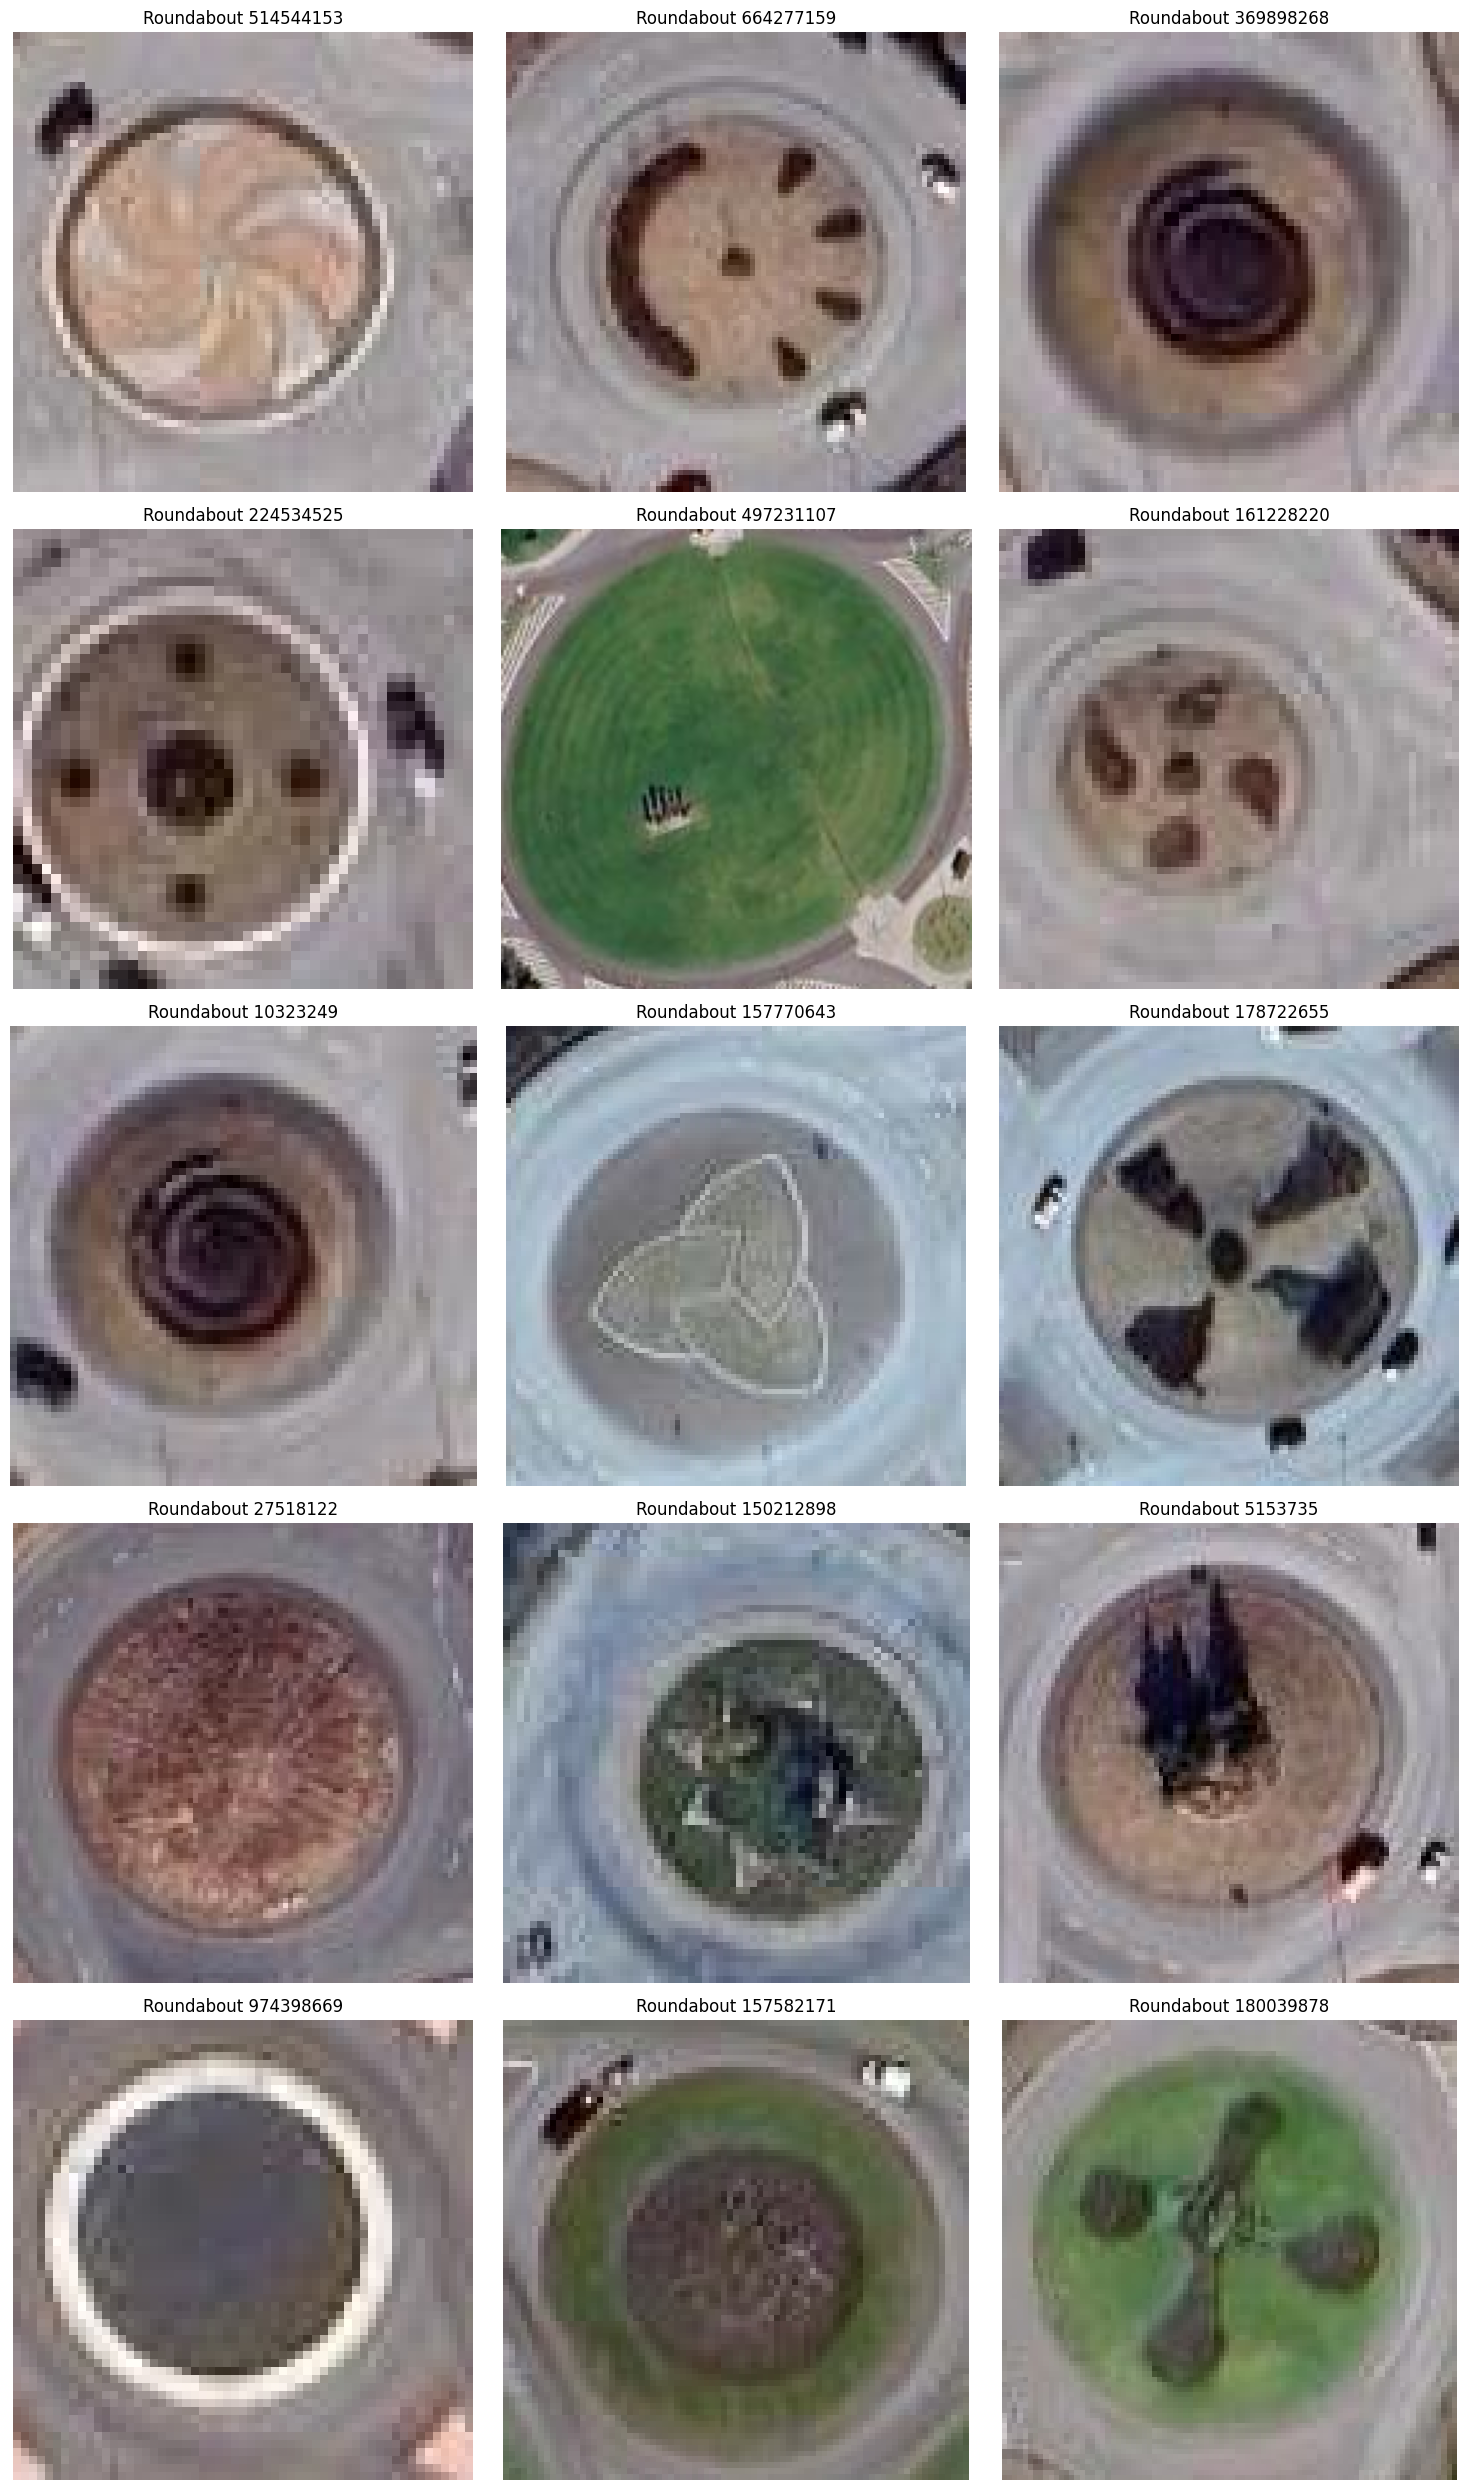

In [30]:
# Number of images
n = len(selection)
cols = 3  # Number of columns in the subplot grid
rows = (n // cols) + (n % cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to easily iterate even if there are empty subplots

for i, x in enumerate(selection):
    # Construct the file path
    path = os.path.join('img', f'roundabout_{x}.tif')

    # Open the TIFF file and read it
    with rasterio.open(path) as src:
        image = src.read([1, 2, 3])  # Read the first 3 bands (RGB) if available

    # Display the image on the subplot
    axes[i].imshow(image.transpose(1, 2, 0))  # Transpose to (height, width, channels)
    axes[i].set_title(f"Roundabout {x}")
    axes[i].axis('off')  # Hide axis for a cleaner look

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Make Background image of all roundabouts

['img/roundabout_657420305.tif', 'img/roundabout_978494200.tif', 'img/roundabout_670564734.tif', 'img/roundabout_844529037.tif', 'img/roundabout_1316158016.tif', 'img/roundabout_321743685.tif', 'img/roundabout_646606150.tif', 'img/roundabout_237172942.tif', 'img/roundabout_34079005.tif', 'img/roundabout_512949566.tif', 'img/roundabout_83277352.tif', 'img/roundabout_143778990.tif', 'img/roundabout_486457206.tif', 'img/roundabout_1258829883.tif', 'img/roundabout_174392931.tif', 'img/roundabout_29482379.tif', 'img/roundabout_83277355.tif', 'img/roundabout_111688997.tif', 'img/roundabout_180039878.tif', 'img/roundabout_196588472.tif', 'img/roundabout_887026902.tif', 'img/roundabout_957269986.tif', 'img/roundabout_298540868.tif', 'img/roundabout_23341484.tif', 'img/roundabout_38294512.tif', 'img/roundabout_19791622.tif', 'img/roundabout_237172947.tif', 'img/roundabout_161795645.tif', 'img/roundabout_7997603.tif', 'img/roundabout_50261420.tif', 'img/roundabout_1286058225.tif', 'img/roundabou

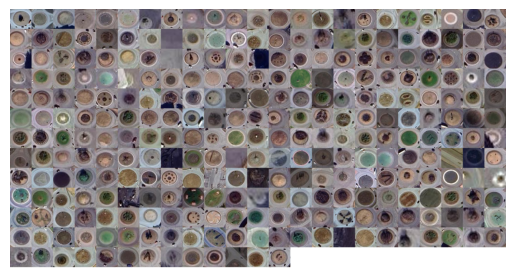

In [31]:
import numpy as np
import rasterio
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define the directory containing the images
image_dir = 'img'

# List to store image paths
image_paths = []

# Loop through the files in the directory
for file_name in os.listdir(image_dir):
    # Check if the file has a valid image extension
    if file_name.lower().endswith(('.tif')):
        # Construct the full file path
        full_path = os.path.join(image_dir, file_name)
        # Add the path to the list
        image_paths.append(full_path)

# Print the list of image paths
print(image_paths)


# Set A4 size in pixels (assuming 300 DPI)
dpi = 300
a4_width_in = 23 # A4 width in inches
a4_height_in = 12  # A4 height in inches
a4_width_px = int(a4_width_in * dpi)
a4_height_px = int(a4_height_in * dpi)

# Number of images per row and column
n_images = len(image_paths)
aspect_ratio = a4_width_px / a4_height_px
n_cols = int(np.sqrt(n_images * aspect_ratio))
n_rows = int(np.ceil(n_images / n_cols))

# Calculate individual image size
img_width_px = a4_width_px // n_cols
img_height_px = a4_height_px // n_rows

# Create a blank A4 image
background = Image.new("RGB", (a4_width_px, a4_height_px), (255, 255, 255))

# Iterate through the images and paste them
for idx, path in enumerate(image_paths):
    try:
        with rasterio.open(path) as src:
            # Read RGB bands and stack them
            r = src.read(1)
            g = src.read(2)
            b = src.read(3)
            rgb = np.dstack((r, g, b)).astype(np.uint8)

        # Convert the NumPy array to a PIL Image
        img = Image.fromarray(rgb)

        # Resize the image to fit the grid cell
        img_resized = img.resize((img_width_px, img_height_px), resample=Image.Resampling.LANCZOS)

        # Determine position in the grid
        row = idx // n_cols
        col = idx % n_cols
        x = col * img_width_px
        y = row * img_height_px

        # Paste the resized image onto the background
        background.paste(img_resized, (x, y))

    except Exception as e:
        print(f"Error processing {path}: {e}")

plt.imshow(background)
plt.axis('off')

# Save or display the A4 image
background.save("roundabouts_a4.jpg", "JPEG", dpi=(300, 300))